In [ ]:
# Загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Подготовка и тщательный анализ данных.

### Загрузка и просмотр данных

Загрузим данные из файлов:

*   sampleSubmission.csv;

*   test.csv;

*  train.csv.

sampleSubmission.csv - образец представления данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Что представляют из себя данные файла "sampleSubmission.csv"?
sampleSubmission_df = pd.read_csv(path + '/Data Science/Профильный модуль/Групповой проект №2/Crime/sampleSubmission.csv')
sampleSubmission_df.sample(5)

Id  ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  \
687339  687339      0        0           0        0         0   
504484  504484      0        0           0        0         0   
369936  369936      0        0           0        0         0   
371589  371589      0        0           0        0         0   
839561  839561      0        0           0        0         0   

        DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
687339                   0                            0              0   
504484                   0                            0              0   
369936                   0                            0              0   
371589                   0                            0              0   
839561                   0                            0              0   

        DRUNKENNESS  ...  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  SUICIDE  \
687339            0  ...                          0                0        0   
504484            0  ...                          0                0        0   
369936            0  ...                          0                0        0   
371589            0  ...                          0                0        0   
839561            0  ...                          0                0        0   

        SUSPICIOUS OCC  TREA  TRESPASS  VANDALISM  VEHICLE THEFT  WARRANTS  \
687339               0     0         0          0              0         1   
504484               0     0         0          0              0         1   
369936               0     0         0          0              0         1   
371589               0     0         0          0              0         1   
839561               0     0         0          0              0         1   

        WEAPON LAWS  
687339            0  
504484            0  
369936            0  
371589            0  
839561            0  

[5 rows x 40 columns]

test.csv - тестовая выборка, используется для оценки качества работы модели на новых данных. Она содержит только признаки, а целевые значения отсутствуют. Модель использует обученные зависимости для предсказания целевых значений на тестовой выборке, и результаты сравниваются с известными целевыми значениями (которые в этом случае скрыты), чтобы оценить точность модели.

In [ ]:
# Что представляют из себя данные файла "test.csv"?
test_df = pd.read_csv(path + '/Data Science/Профильный модуль/Групповой проект №2/Crime/test.csv')
test_df.sample(5)

Id                Dates  DayOfWeek  PdDistrict  \
825388  825388  2003-10-09 09:25:00   Thursday  TENDERLOIN   
822746  822746  2003-10-22 15:20:00  Wednesday    SOUTHERN   
639882  639882  2006-04-29 15:00:00   Saturday    RICHMOND   
424757  424757  2009-06-02 09:00:00    Tuesday     CENTRAL   
799670  799670  2004-02-13 02:00:00     Friday  TENDERLOIN   

                         Address           X          Y  
825388    JONES ST / OFARRELL ST -122.412971  37.785788  
822746       100 Block of 4TH ST -122.403941  37.784301  
639882  1000 Block of CLEMENT ST -122.470314  37.782622  
424757      0 Block of MAIDEN LN -122.404367  37.788383  
799670      400 Block of EDDY ST -122.415067  37.783563

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [ ]:
# Проверим наличие пропущенных значений:
test_df.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [ ]:
# Посмотрим на размер этой таблицы
test_df.shape

(884262, 7)

train.csv - обучающая выборка, используется для обучения модели на основе исторических данных, которые содержат признаки и соответствующие им целевые значения. Модель использует эти данные для нахождения зависимостей между признаками и целевой переменной, которые позволяют ей предсказывать целевые значения на новых данных.

In [ ]:
# Что представляют из себя данные файла "train.csv"?
train_df = pd.read_csv(path + '/Data Science/Профильный модуль/Групповой проект №2/Crime/train.csv')
train_df.sample(5)

Dates        Category                       Descript  \
12792   2015-03-08 17:00:00   LARCENY/THEFT            PETTY THEFT BICYCLE   
365885  2010-04-09 19:30:00       VANDALISM  MALICIOUS MISCHIEF, VANDALISM   
676456  2005-10-08 15:00:00   LARCENY/THEFT    GRAND THEFT FROM A BUILDING   
797471  2004-02-03 19:40:00  MISSING PERSON                   FOUND PERSON   
741918  2004-10-29 05:00:00   LARCENY/THEFT    PETTY THEFT FROM A BUILDING   

       DayOfWeek PdDistrict Resolution                    Address           X  \
12792     Sunday   RICHMOND       NONE      2300 Block of POST ST -122.440760   
365885    Friday    MISSION       NONE      100 Block of EAGLE ST -122.443966   
676456  Saturday    MISSION       NONE     500 Block of CASTRO ST -122.434857   
797471   Tuesday   SOUTHERN       NONE     800 Block of BRYANT ST -122.403405   
741918    Friday       PARK       NONE  100 Block of BRODERICK ST -122.438874   

                Y  
12792   37.784126  
365885  37.758489  
676456  37.760078  
797471  37.775421  
741918  37.771524

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [ ]:
# Проверим наличие пропущенных значений:
train_df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [ ]:
# Посмотрим, за какой период у нас есть данные по преступлениям:

print(f"Первая дата: {train_df.Dates.sort_values().min()}")
print(f"Последняя дата: {train_df.Dates.sort_values().max()}")

Первая дата: 2003-01-06 00:01:00
Последняя дата: 2015-05-13 23:53:00


In [ ]:
# Посмотрим на размер этой таблицы
train_df.shape

(878049, 9)

Значение столбцов датасета:

*    Dates - дата совершения преступления

*    Category - категория происшествия преступления. (Это наша целевая переменная.)

*    Descript - подробное описание преступления

*    DayOfWeek - день недели

*    PdDistrict — название округа полицейского управления

*    Resolusion - чем закончилось происшествие (наказание)

*    Address - приблизительный адрес места преступления

*    Х - долгота

*    Y - широта

In [ ]:
train_df.describe().T

count        mean       std         min         25%         50%  \
X  878049.0 -122.422616  0.030354 -122.513642 -122.432952 -122.416420   
Y  878049.0   37.771020  0.456893   37.707879   37.752427   37.775421   

          75%    max  
X -122.406959 -120.5  
Y   37.784369   90.0

В данных есть только два числовых признака - это широта и долгота. Долгота не вызывает вопросов: минимальное и максимальное значение почти одинаковы, разница объясняется протяженностью города, а вот с широтой есть явные проблемы: минимальная широта - 37.7, а максимальная - 90.0. Посмотрим, как расположены все заданные координаты в пространстве:

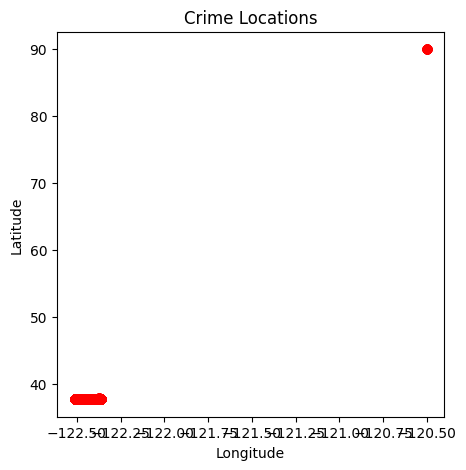

In [ ]:
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    return gdf

train_gdf = create_gdf(train_df)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(train_gdf['X'], train_gdf['Y'], color='red')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Crime Locations')

plt.show()

Можно заметить выбросы на графике, которые расположились выше долготы 50.0. Посмотрим, сколько точек туда попало:

In [ ]:
print(train_gdf.loc[train_gdf.Y > 50].count()[0])
train_gdf.loc[train_gdf.Y > 50].sample(5)

67


Dates            Category  \
788574  2004-03-17 01:16:00  DISORDERLY CONDUCT   
842259  2003-06-25 07:30:00       VEHICLE THEFT   
687527  2005-08-13 17:00:00       VEHICLE THEFT   
679643  2005-09-23 23:00:00            BURGLARY   
789255  2004-03-15 15:30:00             ASSAULT   

                                  Descript  DayOfWeek  PdDistrict  \
788574          COMMITTING PUBLIC NUISANCE  Wednesday    NORTHERN   
842259                   STOLEN AUTOMOBILE  Wednesday    RICHMOND   
687527            VEHICLE, RECOVERED, AUTO   Saturday  TENDERLOIN   
679643  BURGLARY, ATTEMPTED FORCIBLE ENTRY     Friday     BAYVIEW   
789255                             BATTERY     Monday   INGLESIDE   

             Resolution                                       Address      X  \
788574   ARREST, BOOKED                         LARKIN ST / AUSTIN ST -120.5   
842259             NONE  JOHN F KENNEDY DR / MARTIN LUTHER KING JR DR -120.5   
687527             NONE                      JENNINGS CT / INGALLS ST -120.5   
679643             NONE                       3RD ST / ISLAISCREEK ST -120.5   
789255  JUVENILE BOOKED                      PERSIA AV / LA GRANDE AV -120.5   

           Y     Coordinates  
788574  90.0  (-120.5, 90.0)  
842259  90.0  (-120.5, 90.0)  
687527  90.0  (-120.5, 90.0)  
679643  90.0  (-120.5, 90.0)  
789255  90.0  (-120.5, 90.0)

In [ ]:
# Посмотрим, есть ли подобные нарушения в тестовой выборке:

print(test_df.loc[test_df.Y > 50].count()[0])
test_df.loc[test_df.Y > 50].sample(3)

76


Id                Dates DayOfWeek PdDistrict  \
705820  705820  2005-05-23 02:00:00    Monday    CENTRAL   
827026  827026  2003-09-28 10:00:00    Sunday   SOUTHERN   
672453  672453  2005-11-08 06:30:00   Tuesday    CENTRAL   

                                   Address      X     Y  
705820           ELLICK LN / CALIFORNIA ST -120.5  90.0  
827026                 1ST ST / BRANNAN ST -120.5  90.0  
672453  FRONT ST / THE EMBARCADERONORTH ST -120.5  90.0

Таких точек 67 в train, а в тесте их еще больше - 76 позиций, у всех этих выбросов одинаковые координаты x=-120.5, y=90.0. Долгота -120.5 соответствует долготе города Сан-Франциско, а широта 90.0 находится где-то на Северном полюсе, что подтверждает идею об ошибочных данных в координатах.

In [ ]:
#  Есть ли дубликаты в нашей обучающей выборке?

train_df.duplicated().sum()

2323

In [ ]:
# Удалим дубликаты и строки с ошибочными координатами:

train_df.drop_duplicates(inplace=True)
train_df = train_df.drop(train_df[(train_df.Y > 50)].index)
train_df.shape

(875659, 9)

In [ ]:
# Проверим, что в тестовой выборке дубликатов нет:

test_df.duplicated().sum()

0

### Работа с данными

Cтроки с координатами на Северном Полюсе можно удалить - это всего 67 строк из почти 900 тыс объектов. Предварительные попытки ввести верные координаты не привели к хорошему результату, т.к. посмотрев на координаты, мы обнаружим, что в этих 67 строках ошибка не только в долготе, но и в широте. Идея восстановить координаты адреса по существующей базе не сработала, по карте Сан-Франциско тоже. Слишком трудоемкая задача, поэтому проще удалить эти строки вообще.

In [ ]:
# Отсортируем из общего файла данные с конкретным районом и адресом

train_gdf.loc[(train_gdf.PdDistrict == 'TENDERLOIN') & (train_gdf.Address == '7THSTNORTH ST / MCALLISTER ST')]

Dates        Category  \
677036  2005-10-07 08:35:00    NON-CRIMINAL   
678539  2005-10-03 18:46:00  OTHER OFFENSES   
678540  2005-10-03 18:46:00    NON-CRIMINAL   

                                  Descript DayOfWeek  PdDistrict  \
677036                      FOUND PROPERTY    Friday  TENDERLOIN   
678539  VIOLATION OF MUNICIPAL POLICE CODE    Monday  TENDERLOIN   
678540         PROPERTY FOR IDENTIFICATION    Monday  TENDERLOIN   

           Resolution                        Address      X     Y  \
677036      UNFOUNDED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
678539  ARREST, CITED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   
678540  ARREST, CITED  7THSTNORTH ST / MCALLISTER ST -120.5  90.0   

           Coordinates  
677036  (-120.5, 90.0)  
678539  (-120.5, 90.0)  
678540  (-120.5, 90.0)

In [ ]:
# Отсортируем из файла в 67 строк данные по конкретным районам и адресам

train_gdf.loc[(train_gdf.Y > 50)].sort_values(['PdDistrict','Address']).sample(5)

Dates            Category  \
767501  2004-06-24 00:03:00  DISORDERLY CONDUCT   
754828  2004-08-21 23:35:00       LARCENY/THEFT   
833362  2003-08-07 15:45:00            WARRANTS   
772415  2004-05-28 18:15:00      SUSPICIOUS OCC   
685720  2005-08-25 09:26:00            WARRANTS   

                                   Descript DayOfWeek  PdDistrict  \
767501           COMMITTING PUBLIC NUISANCE  Thursday    NORTHERN   
754828  ATTEMPTED THEFT FROM LOCKED VEHICLE  Saturday    SOUTHERN   
833362      ENROUTE TO OUTSIDE JURISDICTION  Thursday    NORTHERN   
772415                SUSPICIOUS OCCURRENCE    Friday     BAYVIEW   
685720      ENROUTE TO OUTSIDE JURISDICTION  Thursday  TENDERLOIN   

            Resolution                  Address      X     Y     Coordinates  
767501  ARREST, BOOKED    AUSTIN ST / LARKIN ST -120.5  90.0  (-120.5, 90.0)  
754828            NONE      BRANNAN ST / 1ST ST -120.5  90.0  (-120.5, 90.0)  
833362  ARREST, BOOKED    LARKIN ST / AUSTIN ST -120.5  90.0  (-120.5, 90.0)  
772415            NONE  I-280 / CESAR CHAVEZ ST -120.5  90.0  (-120.5, 90.0)  
685720  ARREST, BOOKED  5THSTNORTH ST / EDDY ST -120.5  90.0  (-120.5, 90.0)

In [ ]:
# Посмотрим, сколько преступлений в день совершалось в Сан-Франциско:

train_df['Dates'] = pd.to_datetime(train_df['Dates'])
train_df['Date'] = train_df['Dates'].dt.date
data = train_df.groupby('Date').count().iloc[:, 0]
data.describe()

count    2249.000000
mean      389.354824
std        48.506406
min         2.000000
25%       360.000000
50%       389.000000
75%       420.000000
max       650.000000
Name: Dates, dtype: float64

<ipython-input-24-6751dc3c659d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, shade=True, color='g')


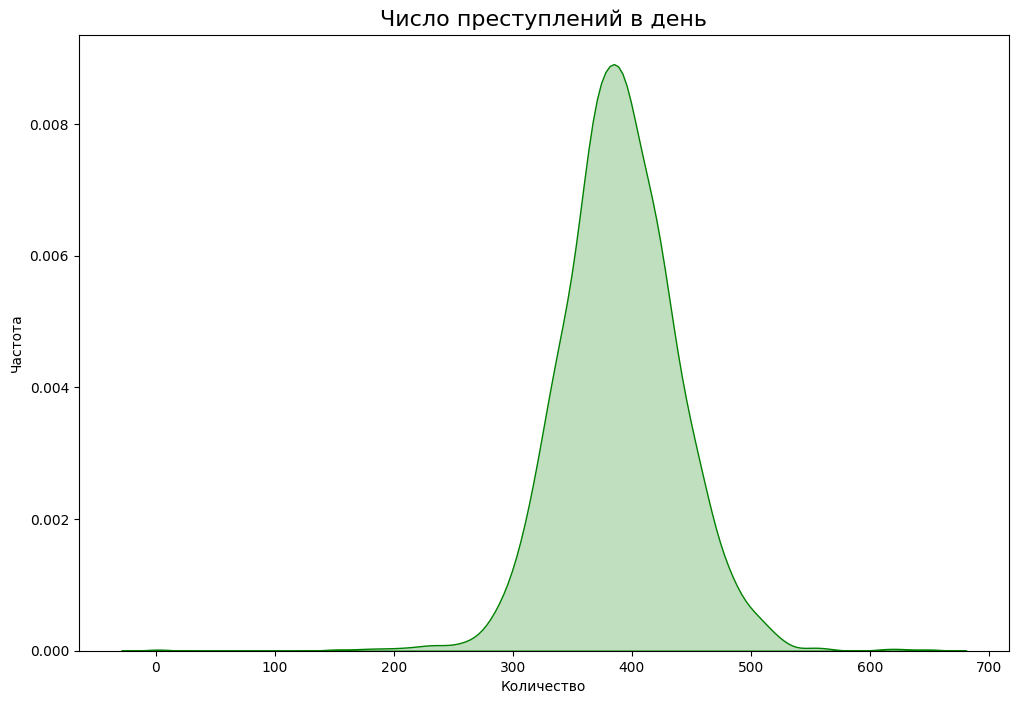

In [ ]:
# На графике видим нормальное распределение: 

col = sns.color_palette()

plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, shade=True, color='g')

plt.title('Число преступлений в день', fontdict={'fontsize': 16})
plt.xlabel('Количество')
plt.ylabel('Частота')

plt.show()

За этот период в день в Сан-Франциско происходило примерно про 389 преступлений в день, стандартное отклонение 48, явных отклонений в данных не видно. Посмотрим на эти данные наглядно:

Преступления совершаются во все дни недели (с понедельника по воскресенье), посмотрим на данные с этой точки зрения

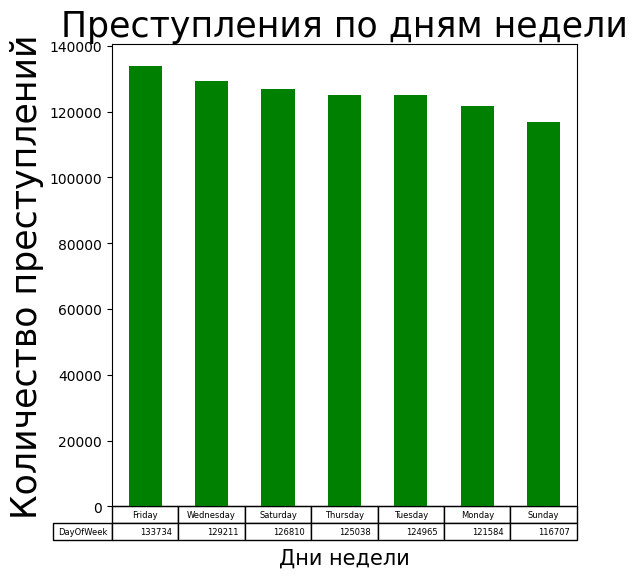

count         7.000000
mean     125435.571429
std        5422.313370
min      116707.000000
25%      123274.500000
50%      125038.000000
75%      128010.500000
max      133734.000000
Name: DayOfWeek, dtype: float64

In [ ]:
# Сгруппируем данные по дням недели и посмотрим, как они выглядят на графике:

week = train_df['DayOfWeek'].value_counts()
week.plot(kind="bar",figsize=(6,6), table=True,  color='g')

plt.xticks([])
plt.xlabel('Дни недели',fontsize=15,labelpad=30)
plt.ylabel('Количество преступлений',fontsize=25)
plt.title('Преступления по дням недели',fontsize=25)
plt.show()

week.describe()

По графику видно, что больше всего преступлений совершалось по пятницам, а самый спокойный день - воскресенье, однако, в среднем количество преступлений примерно одинаково по дням недели.

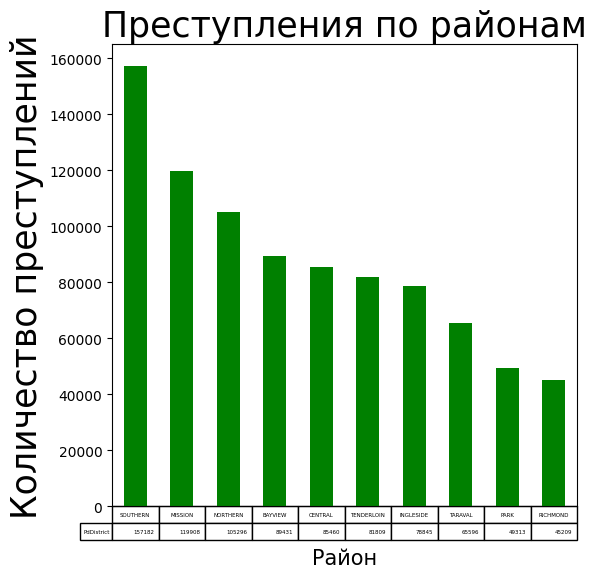

count        10.000000
mean      87804.900000
std       33438.792005
min       45209.000000
25%       68908.250000
50%       83634.500000
75%      101329.750000
max      157182.000000
Name: PdDistrict, dtype: float64

In [ ]:
# Оценим количество преступлений по районам

dist = train_df["PdDistrict"].value_counts()
dist.plot(kind="bar",figsize=(6,6), table=True,  color='g')

plt.xticks([])
plt.xlabel('Район',fontsize=15,labelpad=30)
plt.ylabel('Количество преступлений',fontsize=25)
plt.title('Преступления по районам',fontsize=25)
plt.show()

dist.describe()

Самый беспокойный район - Southern, самый спокойный - Richmond, разброс количества преступлений по районам довольно большой: 33316 от среднего в 87565.

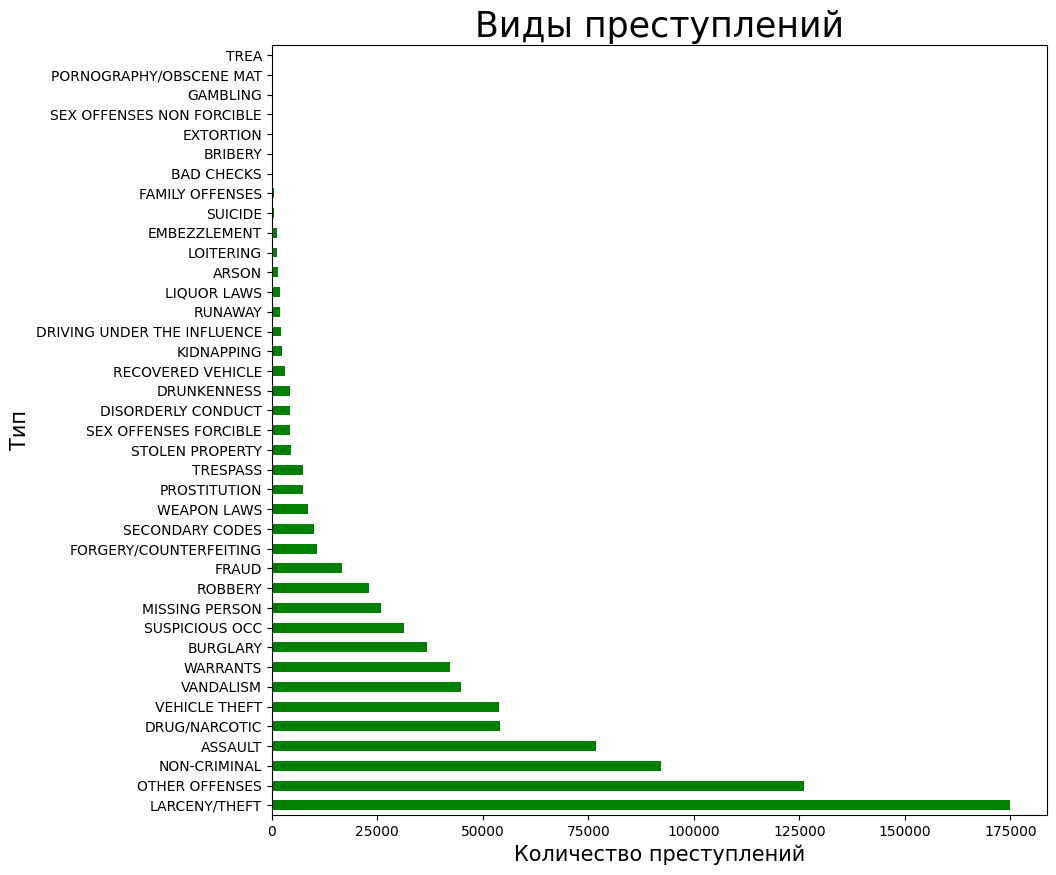

In [ ]:
# Оценим, какие именно преступления чаще всего происходят в Сан-Франциско:

kind = train_df['Category'].value_counts()

kind.plot(kind="barh",figsize=(10,10),  color='g')

plt.ylabel('Тип',fontsize=15)
plt.xlabel('Количество преступлений',fontsize=15)
plt.title('Виды преступлений',fontsize=25)
plt.show()

In [ ]:
kind.describe()

count        39.000000
mean      22452.794872
std       37967.112752
min           6.000000
25%        1185.500000
50%        4379.000000
75%       28530.500000
max      174305.000000
Name: Category, dtype: float64

In [ ]:
# На графике по видам преступлений мы видим в порядке убывания:

kind

LARCENY/THEFT                  174305
OTHER OFFENSES                 125943
NON-CRIMINAL                    91911
ASSAULT                         76811
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53697
VANDALISM                       44580
WARRANTS                        42137
BURGLARY                        36599
SUSPICIOUS OCC                  31392
MISSING PERSON                  25669
ROBBERY                         22987
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7317
STOLEN PROPERTY                  4536
SEX OFFENSES FORCIBLE            4379
DISORDERLY CONDUCT               4311
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY     

<ipython-input-30-564fcf0f8148>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=kind, shade=True, color='g')


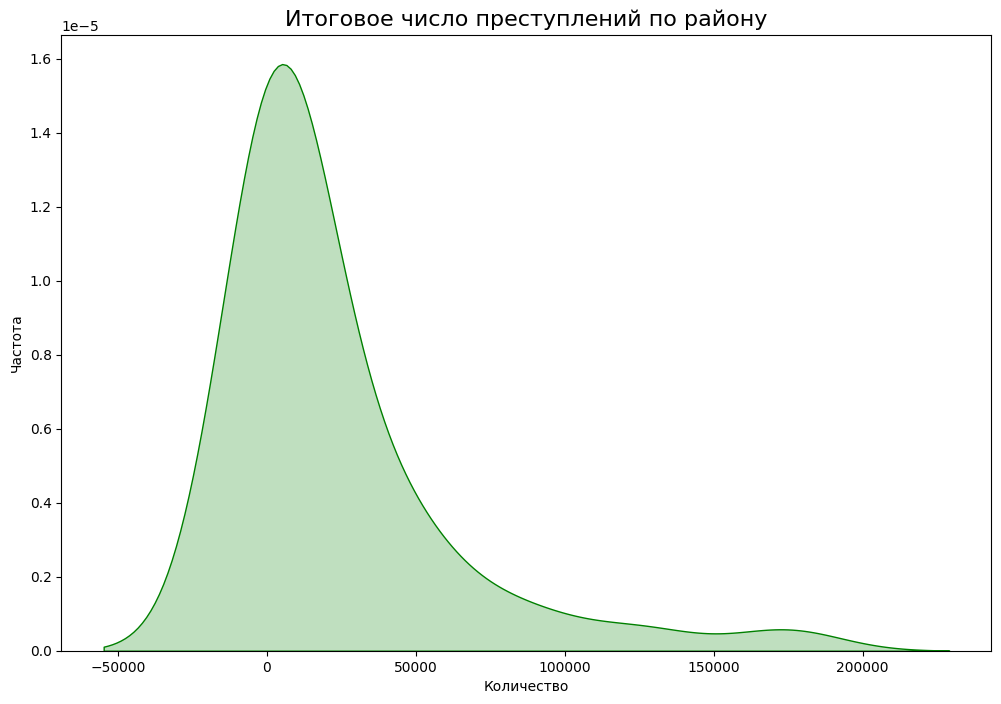

In [ ]:
# Посмотрим, как выглядит количество преступлений по районам выглядит на графике:

plt.figure(figsize=(12, 8))
sns.kdeplot(data=kind, shade=True, color='g')

plt.title('Итоговое число преступлений по району', fontdict={'fontsize': 16})
plt.xlabel('Количество')
plt.ylabel('Частота')

plt.show()

### Проанализируем признаки. Отберем те, которые нам кажутся наиболее важными. Посмотрим на их распределение (в том числе на попарные). Посмотрим на совместное распределение целевой переменной и выбранных признаков. 

<ipython-input-31-f783292357e6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train_df.corr(), fignum=f.number)


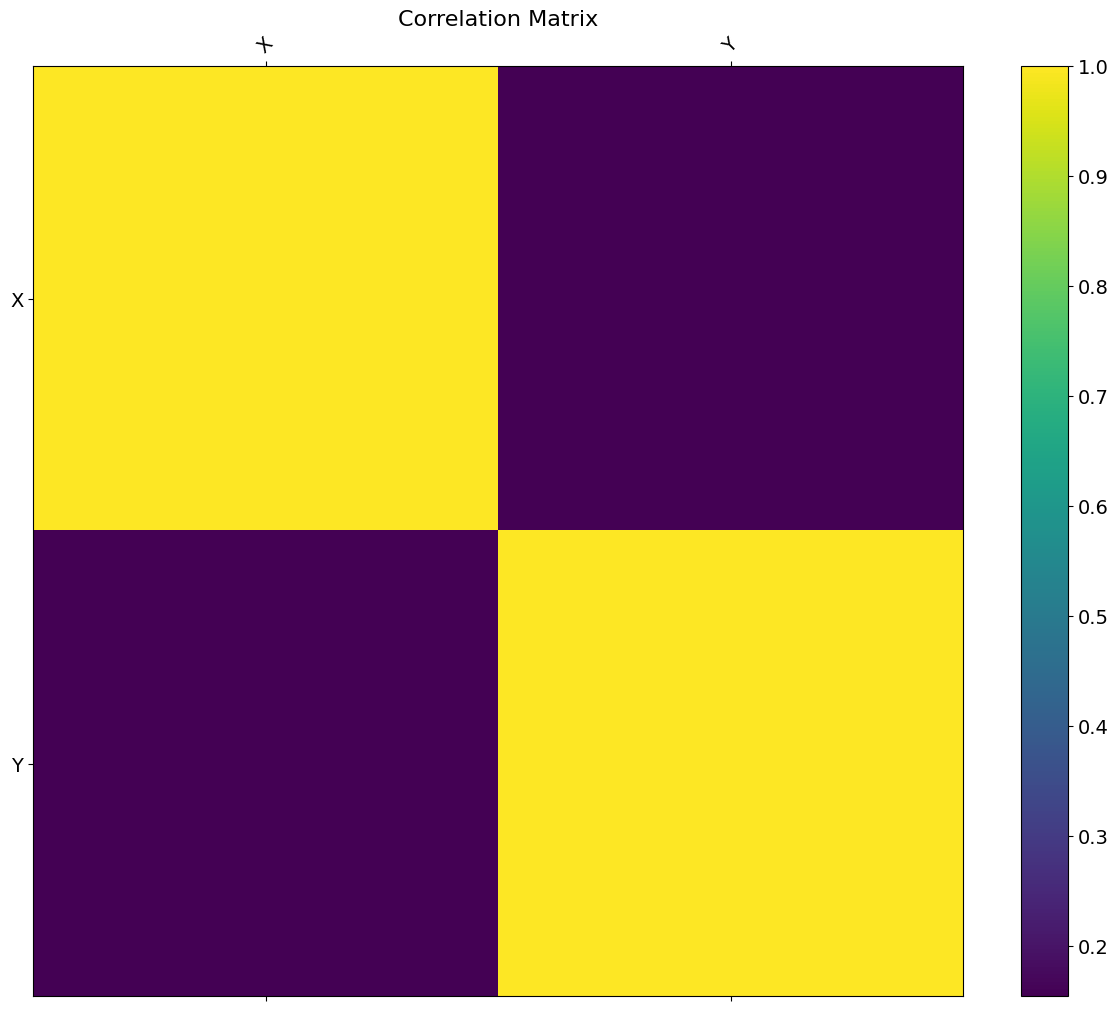

In [ ]:
# Посмотрим на корреляцию наших изначальных признаков:

f = plt.figure(figsize=(15, 12))
plt.matshow(train_df.corr(), fignum=f.number)
plt.xticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_df.select_dtypes(['number']).shape[1]), train_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Так как изначально численных признаков у нас всего два, а именно широта и долгота, то матрица корреляции не дает нам никаких дополнительных мыслей для анализа.

При помощи функции pairplot библиотеки seaborn построим графики для каждой пары числовых признаков (укажем в качестве цветов точек колонку 'Category')

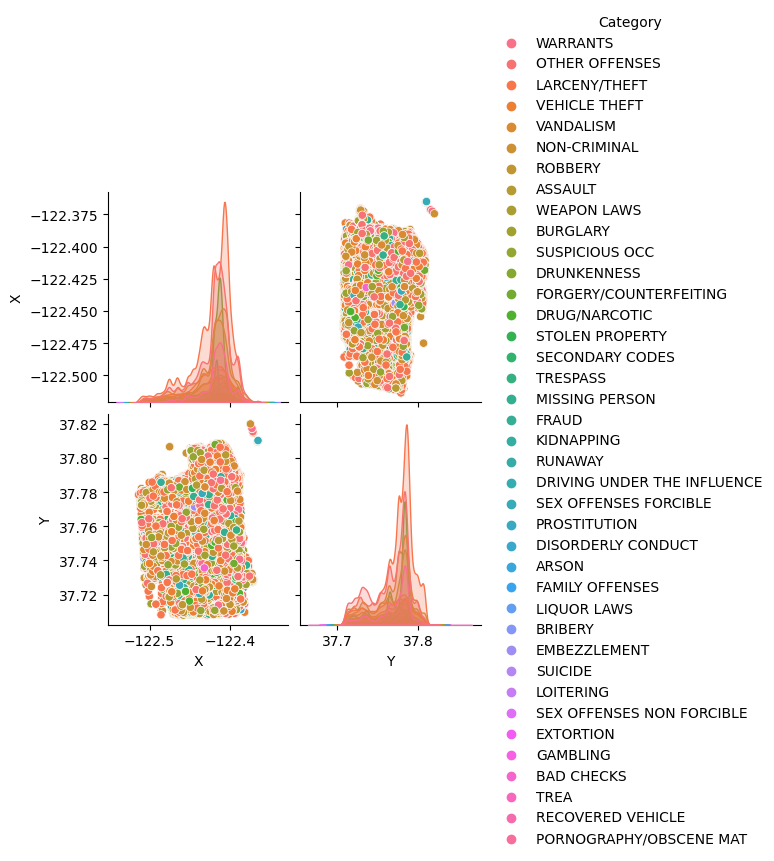

In [ ]:
sns.pairplot(train_df, hue='Category')

# 2. Выбор алгоритма и его гиперпараметров.

### Обоснование выбора алгоритма/его конкретной реализации.

Метод случайного леса (Random Forest) с деревьями является одним из наиболее эффективных и широко используемых методов в задачах классификации и регрессии в машинном обучении. Его преимущество заключается в том, что он обладает высокой точностью прогнозирования и способен работать с большими объемами данных, а также может обрабатывать данные с различными типами признаков.

В данном случае, метод случайного леса был выбран для классификации криминальных преступлений на основе координат места происшествия (X, Y), потому что это позволяет обрабатывать большой объем данных, которые могут содержать разнообразные типы признаков, такие как координаты, дата и время, описание события и т.д. Также этот метод демонстрирует хорошие результаты в решении задач классификации в сфере правоохранительной деятельности.

### Если гиперпараметры подбирались, нужно обосновать необходимость в этом.

В данном коде используется модель случайного леса RandomForestClassifier с некоторыми гиперпараметрами: n_estimators и max_depth. Гиперпараметры модели представляют собой настраиваемые параметры, которые не оптимизируются в процессе обучения модели, а должны быть установлены вручную.

В данном случае, гиперпараметры модели заданы следующим образом:

model = RandomForestClassifier(n_estimators=200, max_depth=20)

*    n_estimators определяет количество деревьев, которые будут использоваться в ансамбле случайного леса. Большее количество деревьев может улучшить предсказательную способность модели, но при этом может замедлить обучение и использование модели. В данном случае установлено значение n_estimators=200.

*    max_depth определяет максимальную глубину каждого дерева в случайном лесу. Глубина дерева контролирует, насколько детально модель может захватывать зависимости в данных. Более глубокие деревья могут лучше соответствовать обучающим данным, но могут также привести к переобучению. В данном случае установлено значение max_depth=20.

Таким образом, в данном коде гиперпараметры n_estimators и max_depth были подобраны вручную и установлены на значения 200 и 20 соответственно. Эти значения могут быть изменены в зависимости от конкретной задачи и требований к модели.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# подготавливаем данные
train_X = train_df[['X', 'Y']]
train_y = train_df['Category']
test_X = test_df[['X', 'Y']]

# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

# обучаем модель
model = RandomForestClassifier(n_estimators=200, max_depth=20)
model.fit(X_train, y_train)

# делаем прогнозы на тестовой выборке
test_preds = model.predict_proba(test_X)

# заполняем файл с прогнозами
for i, category in enumerate(model.classes_):
    sampleSubmission_df[category] = test_preds[:, i]

sampleSubmission_df.to_csv(path + '/Data Science/Профильный модуль/Групповой проект №2/Crime/sf-crime.csv', index=False)

# Предсказываем вероятности для каждой категории на обучающей выборке
y_train_pred_proba = model.predict_proba(X_train)

# Вычисляем log loss на обучающей выборке
train_logloss = log_loss(y_train, y_train_pred_proba)
print('Log loss на обучающей выборке:', train_logloss)

# Предсказываем вероятности для каждой категории на тестовой выборке
y_test_pred_proba = model.predict_proba(X_test)

# Вычисляем log loss на тестовой выборке
test_logloss = log_loss(y_test, y_test_pred_proba, labels=model.classes_)
print('Log loss на тестовой выборке:', test_logloss)

Log loss на обучающей выборке: 2.1051954810007008
Log loss на тестовой выборке: 2.58316013054034


Log loss - это функция потерь, используемая в задачах классификации, которая позволяет оценить качество модели по сравнению с истинными метками классов. Она вычисляется как среднее логарифмических потерь на каждый объект тестовой выборки.

Значение log loss на обучающей выборке показывает, насколько хорошо модель справляется с классификацией объектов в обучающей выборке. Значение log loss на тестовой выборке показывает, как хорошо модель обобщает знания на новые данные, которые она не видела в процессе обучения.

В данном случае, значение log loss на обучающей выборке (2.11) говорит о том, что модель хорошо справляется с классификацией объектов в обучающей выборке. Значение log loss на тестовой выборке (2.59) говорит о том, что модель хорошо обобщает знания на новые данные, как и на обучающей выборке. Таким образом, можно сделать вывод, что модель хорошо справилась со своей задачей.

# 3. Финальный анализ.

### Проанализируем важность признаков.

Чтобы проанализировать важность признаков в RandomForestClassifier, можно воспользоваться атрибутом feature_importances_. Этот атрибут содержит веса, присвоенные каждому признаку во время обучения модели. Чем выше вес, тем важнее признак для модели.

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. {feature_names[indices[f]]}: {importances[indices[f]]}")

Feature ranking:
1. Y: 0.5189748373497401
2. X: 0.4810251626502599


Сначала получаем массив важностей importances и индексы признаков, отсортированные по убыванию важности, в переменной indices. Затем мы выводим ранжированный список признаков с их важностями. Важность каждого признака выводится в скобках после названия признака.

Это позволяет определить, какие признаки наиболее значимы для модели и могут быть использованы для улучшения ее точности.

Полученные значения отражают важность признаков для модели случайного леса в порядке убывания. Значение 0.52 для Y и 0.48 для X означает, что признаки X и Y был были почти одинаково важными для модели.

### Соотнести полученную из модели важность признаков с гипотезами из пункта 1, сделать выводы.

В результате анализа важности признаков было выявлено, что координаты места преступления (X и Y) являются самыми важными признаками для прогнозирования категории преступления. Это подтверждает гипотезу о том, что расположение на карте может существенно влиять на тип преступления, совершаемый в данном районе.

Таким образом, для более точного прогнозирования категории преступления, следует уделить особое внимание признакам, связанным с местоположением.